In [1]:
# note on high redshift standardizable candles

In [19]:
%matplotlib notebook

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
# print(os.path.basename('/abc/cde/asdfs.pdf'))
# print(os.path.dirname('/abc/sf/fcde/asdfs.pdf'))

In [22]:
#from MyUnit import NaturalUnit
import numpy as np
import sys,os
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.integrate import quad

#path = '/home/chensun/tomerv_storage/quasars/'
#sys.path.insert(1, path)
import igm as ig
import data as dt
import chi2 as ch
import cosmo as co

from ag_probs import omega_plasma

# Test the $\chi^2$

In [16]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=0.,
                       Gamma_up=100.)
                       
(qso_name_raw_arr,
 qso_z_raw_arr,
 qso_f2500_raw_arr,
 qso_df2500_raw_arr,
 qso_f2keV_raw_arr,
 qso_df2keV_low_raw_arr,
 qso_df2keV_up_raw_arr,
 qso_Gamma_raw_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [45]:
np.sqrt(np.sum(qso_df2500_raw_arr**2/len(qso_df2500_raw_arr)))

0.031522995113098855

In [46]:
np.sqrt(np.sum(qso_df2keV_up_raw_arr**2/len(qso_df2keV_up_raw_arr)))

0.07176609150138073

In [9]:
data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100)
(qso_name_arr,
 qso_z_arr,
 qso_f2500_arr,
 qso_df2500_arr,
 qso_f2keV_arr,
 qso_df2keV_low_arr,
 qso_df2keV_up_arr,
 qso_Gamma_arr) = data

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [215]:
# data = dt.load_quasars("./likelihoods", 
#                        "quasars_Lusso2020.txt",
#                        z_low=0.,
#                        z_up=10.,
#                        Gamma_low=1.2,
#                        Gamma_up=100, 
#                        get_dm=True)
# (qso_name_arr,
#  qso_z_arr,
#  qso_f2500_arr,
#  qso_df2500_arr,
#  qso_f2keV_arr,
#  qso_df2keV_low_arr,
#  qso_df2keV_up_arr,
#  qso_Gamma_arr,
#  qso_dist_mod_arr,
#  qso_ddist_mod_arr) = data

In [10]:
sum(np.where(qso_z_arr<1.4, 1, 0))

1325

In [258]:
print(81394/2442)
np.sqrt(81394/2442)

33.33087633087633


5.773289905320564

In [184]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.0, 0.66, 0.71, 5.)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 5.08)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.71, 8)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

(chi2_ga18, 
 mu_th_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_ga18)

205026.42166432494


In [19]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-11, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

(chi2_ga11, 
 mu_th_ga11_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_ga11)

221161.71901136427


In [20]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-12, 0.6, 0.66, 0.71, 5.)
# x = (10**-13.82, 10**-15.26, 0.5, 0.63, 0.59, 8.61)
# x = (10**-13.82, 10**-15.26, 0.5, 0.66, 0.71, 5)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

(chi2_ga12, 
 mu_th_ga12_arr, 
 mu_exp_arr, 
 sigma_arr,
 qso_z_arr) = ch.chi2_quasars(x,
                              data=data,
                              vectorize=True,
                              full_output=True,
                              **quasars_kwargs)
print(chi2_ga12)

205334.98895556692


<IPython.core.display.Javascript object>


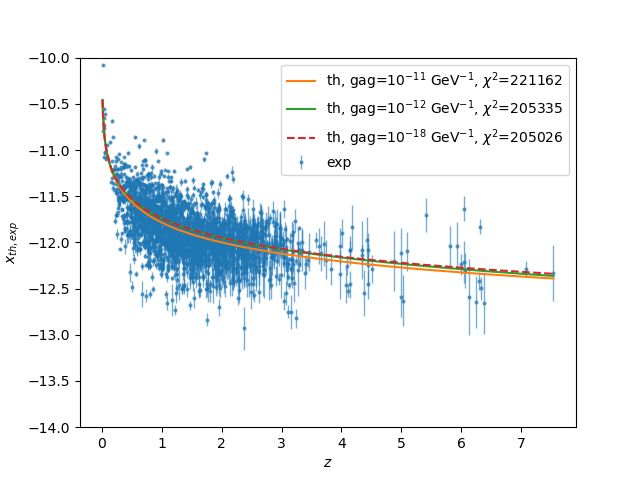

In [39]:
plt.subplots()
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', label='exp', linewidth=1, alpha=0.6, markersize=4)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_ga11_arr)))
plt.plot(x, y, '-', zorder=10, label='th, gag=10$^{-11}$ GeV$^{-1}$, $\chi^2$=%.0f' %chi2_ga11)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_ga12_arr)))
plt.plot(x, y, '-', zorder=11, label='th, gag=10$^{-12}$ GeV$^{-1}$, $\chi^2$=%.0f' %chi2_ga12)

x, y = zip(*sorted(zip(qso_z_arr, mu_th_arr)))
plt.plot(x, y, '--', zorder=12, label='th, gag=10$^{-18}$ GeV$^{-1}$, $\chi^2$=%.0f' %chi2_ga18)
#plt.xscale('log')
#plt.ylim(-13, -11)
plt.ylim(-14, -10)
plt.ylabel('$x_{th, exp}$')
plt.xlabel('$z$')
plt.legend()

# Check UV-X relation

check the UV-X formula by hand
\begin{align}
\log_{10}(f_X) = \gamma \log_{10}(f_{UV}) + 2(\gamma - 1) \log_{10}(D_L) + \beta + (\gamma - 1) \log_{10}(4\pi)
\end{align}

In [75]:
# take one data point from Bisogni table 2
# z = 0.78
-31.12-(-28.21)*0.6

-14.194000000000003

In [78]:
# compute log(fX)-gamma log(fUV)
# w/ beta = 4 (c.f. Risaliti and Lusso at Nature, 1811.02590)
# w/ LCDM
# w/ DL in cm
2.*(0.6-1)*np.log10(5023*3.0857e+24) +4 + (0.6-1)*np.log10(4.*np.pi)

-17.99193744854401

In [77]:
5023*3.0857e+24

1.54994711e+28

In [45]:
from classy import Class
import classy
print(classy.__file__)

params = {
    #'gauge':'synchronous',
    'gauge':'newtonian',
    'input_verbose' : 1,
    'background_verbose' : 2,
    'thermodynamics_verbose': 1,
    'perturbations_verbose': 2,
    'h': 0.7, #0.673,
    'omega_b': 0.02205,
    'Omega_cdm': (0.3 - 0.02205/0.7**2),
    #'omega_cdm': 0.1199,
    #'omega_cdm': 0.01,
    'tau_reio': 0.089,
    'A_s':np.exp(3.089)*10**-10,
    'n_s':0.9603,
    'N_ur' : 2.03351,
    'N_ncdm' : 1,
    'm_ncdm' : 0.06,
    'T_ncdm' : 0.715985, 
    'T_cmb' : 2.2755
}


try:
    cosmo.struct_cleanup()
except:
    pass
# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)
cosmo.compute()

print(cosmo.age())

/home/chen/anaconda3/envs/py38/lib/python3.8/site-packages/classy.cpython-38-x86_64-linux-gnu.so
13.45511764177868


In [124]:
# manually load up the data to check
def log10FX(log10FUV, gamma, beta, z):
    """ w/o axions
    """
    DL_in_cm = cosmo.luminosity_distance(z)*3.0857e+24
    res = gamma*log10FUV + beta + (gamma-1)*np.log10(4.*np.pi) + 2.*(gamma-1)*np.log10(DL_in_cm)
    return res


In [125]:
qso_f2500_arr
qso_f2keV_arr

array([-31.1167, -32.0376, -31.1971, ..., -31.9086, -31.3855, -31.4902])

In [126]:
log10FX_th_arr = []
for i,_ in enumerate(qso_z_arr):
    log10FUV = qso_f2500_arr[i]
    z = qso_z_arr[i]
    log10FX_th_arr.append(log10FX(log10FUV, 
                               gamma=0.71, 
                               beta=5., 
                               z=z))

<IPython.core.display.Javascript object>


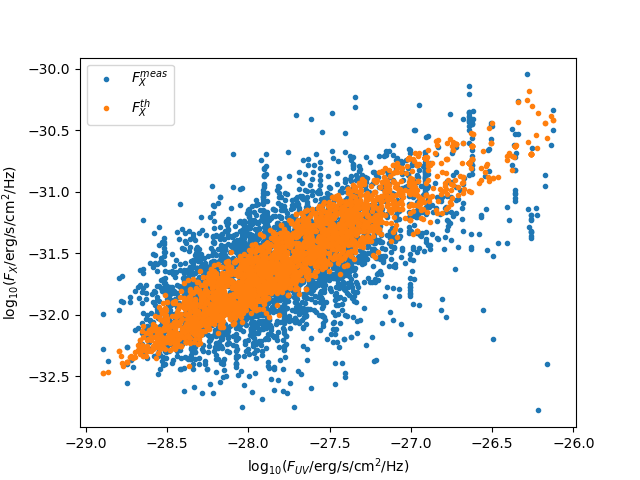

Text(0, 0.5, '$\\log_{10}(F_{X}/\\mathrm{erg/s/cm^2/Hz})$')

In [127]:
plt.subplots()
plt.plot(qso_f2500_arr, qso_f2keV_arr, '.', label=r'$F_{X}^{meas}$')
#plt.plot(qso_f2500_arr, fun_linear(qso_f2500_arr, gamma=0.65, beta=-13.5))
plt.plot(qso_f2500_arr, log10FX_th_arr, '.', label=r'$F_{X}^{th}$')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel(r'$\log_{10}(F_{UV}/\mathrm{erg/s/cm^2/Hz})$')
plt.ylabel(r'$\log_{10}(F_{X}/\mathrm{erg/s/cm^2/Hz})$')

In [71]:
cosmo.luminosity_distance(1)

6604.407462675764

<IPython.core.display.Javascript object>


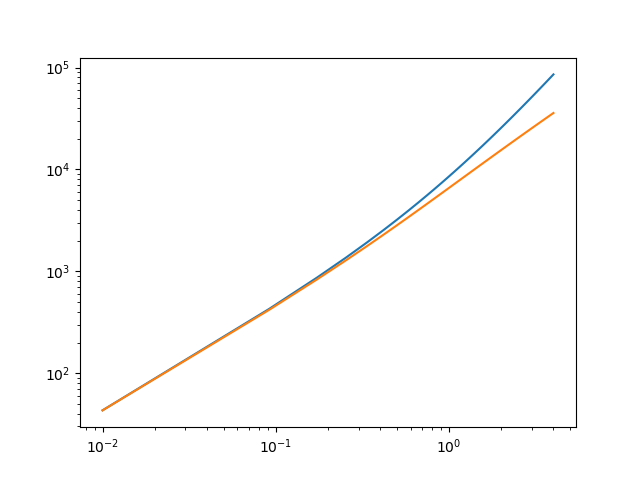

In [74]:
z_arr = np.linspace(0.01, 4)
DL_proxy_arr = (1+z_arr)*z_arr*4282.7494
DL_arr = [cosmo.luminosity_distance(z) for z in z_arr]
plt.subplots()
plt.plot(z_arr, DL_proxy_arr)
plt.plot(z_arr, DL_arr)
plt.xscale('log')
plt.yscale('log')

# Optimization

In [5]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-11, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

In [6]:
%%time
# for loop
ch.chi2_quasars(x, data=data, vectorize=False, **quasars_kwargs)
# CPU times: user 1.33 s, sys: 26.2 ms, total: 1.36 s
# Wall time: 1.36 s
# 122531.70409303115

CPU times: user 1.33 s, sys: 26.2 ms, total: 1.36 s
Wall time: 1.36 s


122531.70409303115

In [7]:
%%time
# numpy vectorized
ch.chi2_quasars(x, data=data, vectorize=True, **quasars_kwargs)

#CPU times: user 1.24 s, sys: 18.3 ms, total: 1.26 s
#Wall time: 1.26 s
#122531.70409303124


CPU times: user 1.24 s, sys: 18.3 ms, total: 1.26 s
Wall time: 1.26 s


122531.70409303124

In [8]:
# quasars_kwargs['prob_func'] = 'small_P'
# quasars_kwargs['Nz'] = 500
quasars_kwargs['method'] = 'quad'

In [9]:
%%time
# tweak method, Nz, prob_func
ch.chi2_quasars(x, data=data, vectorize=True, **quasars_kwargs)

CPU times: user 2.31 s, sys: 136 ms, total: 2.45 s
Wall time: 2.36 s


122531.70409282293

In [10]:
from igm import igm_Psurv
(ma,
  g,
  z,
  s,
  B,
  omega,
  mg,
  h,
  OmL,
  axion_ini_frac,
  smoothed,
  redshift_dependent,
  method,
  prob_func,
  Nz)= (1.2589254117941662e-16, 
        1e-11, 
        0.76489, 
        1.0, 
        1.0, 
        2000.0, 
        4.69758169168822e-15, 
        0.66, 
        0.6, 
        0.0, 
        False, 
        True, 
        'simps', 
        'norm_log', 
        101)

In [56]:
%%timeit
for j in range(2):
    for i in range(len(qso_z_arr)):
        igm_Psurv(ma=ma, 
                  g=g, 
                  z=z,
                  s=s,
                  B=B,
                  omega=omega,
                  mg=mg,
                  h=h,
                  Omega_L=OmL,
                  axion_ini_frac=axion_ini_frac,
                  smoothed=smoothed,
                  redshift_dependent=redshift_dependent,
                  method=method,
                  prob_func=prob_func,
                  Nz=Nz)

1 loop, best of 3: 1.85 s per loop


In [55]:
%%timeit
for j in range(2):
    igm_Psurv(ma=ma, 
          g=g, 
          z=qso_z_arr,
          s=s,
          B=B,
          omega=omega,
          mg=mg,
          h=h,
          Omega_L=OmL,
          axion_ini_frac=axion_ini_frac,
          smoothed=smoothed,
          redshift_dependent=redshift_dependent,
          method='vectorize',
          prob_func=prob_func,
          Nz=Nz)

10 loops, best of 3: 11.6 ms per loop


In [57]:
# improvement
1850/11.6

159.48275862068965

In [12]:
# fraction of time of chi2_quasars() spent on igm_Psurv()
1.09/1.26

0.8650793650793651

In [35]:
from tools import my_ceil
print(my_ceil(1e-8, 4))
print(my_ceil(300987, 4))
print(my_ceil([300987,1e-2, 1e-10], 4))

0.0001
300987.0
[3.00987e+05 1.00000e-02 1.00000e-04]


In [61]:
res_vec_arr = igm_Psurv(ma=ma, 
          g=g, 
          z=qso_z_arr,
          s=s,
          B=B,
          omega=omega,
          mg=mg,
          h=h,
          Omega_L=OmL,
          axion_ini_frac=axion_ini_frac,
          smoothed=smoothed,
          redshift_dependent=redshift_dependent,
          method='vectorize',
          prob_func=prob_func,
          Nz=Nz)


In [63]:
res_simp_arr = []
for z in qso_z_arr:
    res_simp_arr.append(igm_Psurv(ma=ma, 
          g=g, 
          z=z,
          s=s,
          B=B,
          omega=omega,
          mg=mg,
          h=h,
          Omega_L=OmL,
          axion_ini_frac=axion_ini_frac,
          smoothed=smoothed,
          redshift_dependent=redshift_dependent,
          method='simps',
          prob_func=prob_func,
          Nz=Nz))

<IPython.core.display.Javascript object>


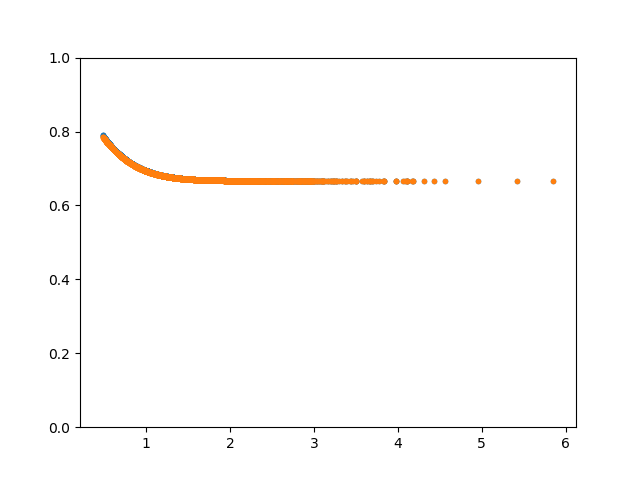

(0, 1)

In [69]:
plt.subplots()
plt.plot(qso_z_arr, res_simp_arr,'.') 
plt.plot(qso_z_arr, res_vec_arr, '.')
#plt.yscale('log')
plt.ylim(0, 1)

<IPython.core.display.Javascript object>


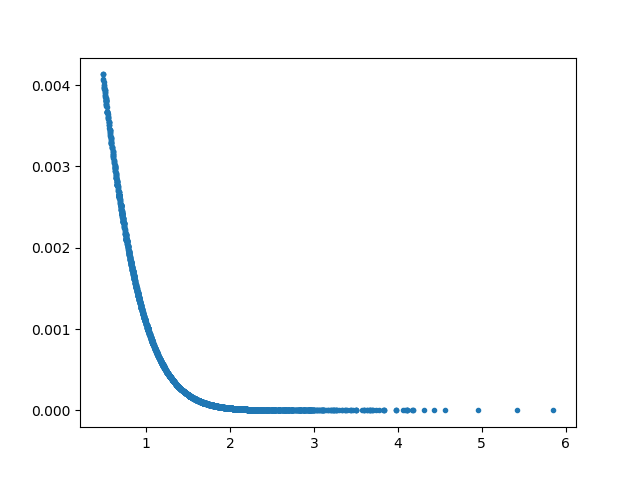

In [71]:
# residual of the two methods
plt.subplots()
plt.plot(qso_z_arr, (res_simp_arr-res_vec_arr)/res_vec_arr,'.') 
#plt.plot(qso_z_arr, res_vec_arr, '.')
#plt.yscale('log')


In [ ]:
# now with true vectorization


In [72]:
# x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
x = (10**-15.9, 1e-11, 0.6, 0.66, 0.71, 5.)

# quasar kwargs
quasars_kwargs = {'B': 1., # [nG]
                  'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                  's': 1., # [Mpc]
                  'omega_X': 2000.,  
                  'omega_UV': 4.96, 
                  'axion_ini_frac': 0.,
                  'smoothed': False,
                  'redshift_dependent': True,
                  'method': 'simps',
                  'prob_func': 'norm_log',
                  'Nz': 101}

In [76]:
%%timeit
# for loop
ch.chi2_quasars(x, data=data, vectorize=False, **quasars_kwargs)
# 1 loop, best of 3: 2.55 s per loop

1 loop, best of 3: 2.55 s per loop


In [77]:
%%timeit
# true vectorized
ch.chi2_quasars(x, data=data, vectorize=True, **quasars_kwargs)
# 10 loops, best of 3: 131 ms per loop


10 loops, best of 3: 131 ms per loop


In [78]:
# improvement
2.55/0.131

19.46564885496183

# Luminosity distance expansion

In [23]:
def DL_poly(z, h0=0.7, OmL=0.7): #Mpc
    OmM = 1.-OmL
    a2 = 1- 0.75*OmM
    a3 = 1./8*OmM*(-10.+9.*OmM)
    a4 = -5./64*OmM*(8.-36.*OmM+27.*OmM**2)
    #x = np.log10(1+z)
    #res = np.log(10)*2997.92458/h0*(x + a2*x**2 + a3*x**3)
    x = z
    res = 2997.92458/h0*(x + a2*x**2 + a3*x**3 + a4*x**4)
    return res

def DL_log(z, h0=0.7, OmL=0.7): #Mpc
    OmM = 1.-OmL
    a2 = 1.5 - 0.75 * OmM
    a3 = 7./6. - 2.*OmM + 9./8 * OmM**2
    #x = np.log10(1+z)
    #res = np.log(10)*2997.92458/h0*(x + a2*x**2 + a3*x**3)
    x = np.log(1+z)
    res = 2997.92458/h0*(x + a2*x**2 + a3*x**3)
    return res

def DL(z, h0=0.7, OmL=0.7):
    res = [(1+zi)*co.tau_at_z(zi, h0, OmL) for zi in z]
    return np.array(res)

In [108]:
DL_poly(np.array([0., 1.]))

array([   0.       , 6466.6170042])

In [109]:
DL_log(np.array([0., 1.]))

array([   0.        , 6544.71556818])

In [110]:
DL([0., 1])

array([   0.        , 6607.65761177])

<IPython.core.display.Javascript object>


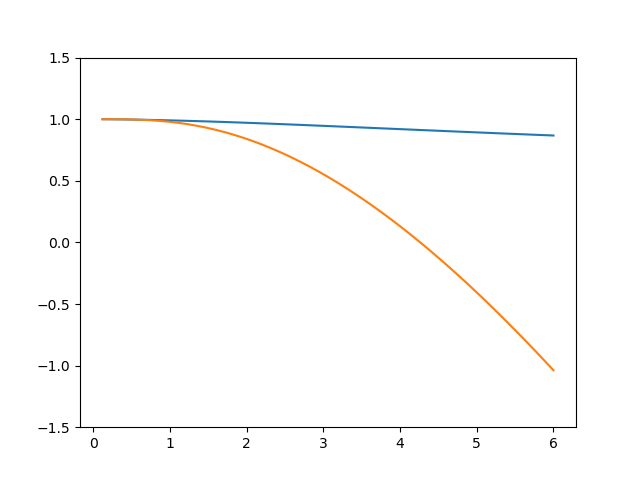

<ipython-input-112-a21db37f2a59>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_arr, DL_log(z_arr)/DL(z_arr))
<ipython-input-112-a21db37f2a59>:6: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(z_arr, DL_poly(z_arr)/DL(z_arr))


(-1.5, 1.5)

In [112]:
plt.subplots()
z_arr = np.linspace(0, 6)
#plt.plot(z_arr, DL_log(z_arr))
#plt.plot(z_arr, DL(z_arr))
plt.plot(z_arr, DL_log(z_arr)/DL(z_arr))
plt.plot(z_arr, DL_poly(z_arr)/DL(z_arr))
plt.ylim(-1.5, 1.5)

# Check data

### distance modulus

In [ ]:
# (qso_name_arr,
#  qso_z_arr,
#  qso_f2500_arr,
#  qso_df2500_arr,
#  qso_f2keV_arr,
#  qso_df2keV_low_arr,
#  qso_df2keV_up_arr) = data

In [24]:
_Mpc_over_cm_ = 3.0857e+24
L_UV_arr = 10**qso_f2500_arr * 4.*np.pi*(DL(qso_z_arr)*_Mpc_over_cm_)**2
L_X_arr = 10**qso_f2keV_arr * 4.*np.pi*(DL(qso_z_arr)*_Mpc_over_cm_)**2
dlogL_X_arr = ((qso_df2keV_up_arr+qso_df2keV_low_arr)/2.) 

L_UV_raw_arr = 10**qso_f2500_raw_arr * 4.*np.pi*(DL(qso_z_raw_arr)*_Mpc_over_cm_)**2
L_X_raw_arr = 10**qso_f2keV_raw_arr * 4.*np.pi*(DL(qso_z_raw_arr)*_Mpc_over_cm_)**2
dlogL_X_raw_arr = ((qso_df2keV_up_raw_arr+qso_df2keV_low_raw_arr)/2.) 

<IPython.core.display.Javascript object>


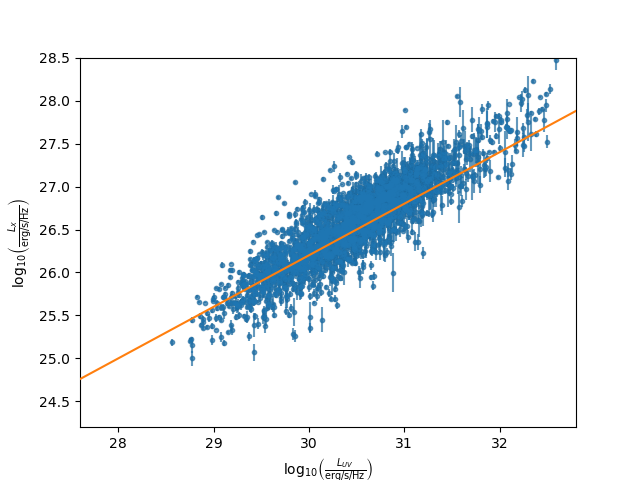

Text(0, 0.5, '$\\log_{10} \\left ( \\frac{L_{X}}{\\rm erg/s/Hz} \\right)$')

In [27]:
plt.subplots()
# plt.plot(np.log10(L_UV_arr), np.log10(L_X_arr), '.')

plt.errorbar(np.log10(L_UV_raw_arr), np.log10(L_X_raw_arr), dlogL_X_raw_arr, fmt='.', alpha=0.2, color='k')
plt.errorbar(np.log10(L_UV_arr), np.log10(L_X_arr), dlogL_X_arr, fmt='.', alpha=0.6)

x_arr = np.linspace(27, 33)
y_arr = 0.6*x_arr + 8.2  # ?? why 7.3
plt.plot(x_arr, y_arr, zorder=10)
plt.ylim(24.2, 28.5)
plt.xlim(27.6, 32.8)
plt.xlabel(r'$\log_{10} \left ( \frac{L_{UV}}{\rm erg/s/Hz} \right)$')
plt.ylabel(r'$\log_{10} \left ( \frac{L_{X}}{\rm erg/s/Hz} \right)$')

### distance modulus

In [218]:
def dist_modulus_th(z, h0=0.7, OmL=0.7):
    DL_in_Mpc = np.array([(1+zi)*co.tau_at_z(zi, h0, OmL) for zi in z])
    DL_in_10pc = DL_in_Mpc * 10**5 # convert to [10pc]
    res = np.log10(DL_in_10pc) * 5.
    return res
    

def dist_modulus_exp(gamma, beta, data):
    """Compute the dist modulus using the quantities from Lusso dataset. 
    """
    (qso_name_arr,
     qso_z_arr,
     qso_f2500_arr,
     qso_df2500_arr,
     qso_f2keV_arr,
     qso_df2keV_low_arr,
     qso_df2keV_up_arr, _) = data
    
    log10_DL_cm = (qso_f2keV_arr - gamma * qso_f2500_arr  - (gamma-1)*np.log10(4.*np.pi) - beta)/2./(gamma-1)
    _10_pc_over_cm_ = 3.0857e+19
    log10_DL_10pc = log10_DL_cm - np.log10(_10_pc_over_cm_)
    
    # error
    sigma = 5/(2.*np.abs(gamma-1))*np.sqrt((gamma*qso_df2500_arr)**2 + (qso_df2keV_low_arr+qso_df2keV_up_arr)**2/4 )
    return (5*log10_DL_10pc, sigma)

def dist_modulus_expread(gamma, beta):
    """Directly read the distance modulus from Lusso dataset.
    """
    data = dt.load_quasars("./likelihoods", 
                       "quasars_Lusso2020.txt",
                       z_low=0.,
                       z_up=10.,
                       Gamma_low=1.2,
                       Gamma_up=100, 
                       get_dm=True)
    (qso_name_arr,
     qso_z_arr,
     qso_f2500_arr,
     qso_df2500_arr,
     qso_f2keV_arr,
     qso_df2keV_low_arr,
     qso_df2keV_up_arr, 
     _, 
     qso_dist_mod_arr,
     qso_ddist_mod_arr) = data
    
    return (qso_dist_mod_arr, qso_ddist_mod_arr)



In [221]:
# exp
(_ ,qso_z_arr ,_ ,_ ,_ ,_ ,_ , _) = data
mu_exp_arr, sigma_arr = dist_modulus_exp(0.65, 6.8, data)

# exp directly read the distance modulus from Lusso data set
mu_expread_arr, sigma_expread_arr = dist_modulus_expread(0.65, 6.8)

# bin data points
# bins = np.linspace(0, 7, 12)
_, bins = np.histogram(qso_z_arr, bins=12)
digi = np.digitize(qso_z_arr, bins)
z_bin_arr = np.array([qso_z_arr[digi==i].mean() for i in range(1, len(bins))])
sigma_bin_arr = np.array([np.sqrt(np.mean((sigma_arr**2)[digi==i])) for i in range(1, len(bins))])
mu_exp_bin_arr = np.array([np.mean(mu_exp_arr[digi==i]) for i in range(1, len(bins))])

# theory
OmL = 0.6
h0 = 0.7
z_arr = np.linspace(0, 7.5, 3000)
mu_th_arr = dist_modulus_th(z_arr, h0=h0, OmL=OmL)

# chi2 using binned data
sum((dist_modulus_th(z_bin_arr, h0=h0, OmL=0.7) - mu_exp_bin_arr)**2/sigma_bin_arr**2)

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


<ipython-input-218-a78ee87dc8f8>:4: RuntimeWarning: divide by zero encountered in log10
  res = np.log10(DL_in_10pc) * 5.


15.565144378887712

<IPython.core.display.Javascript object>


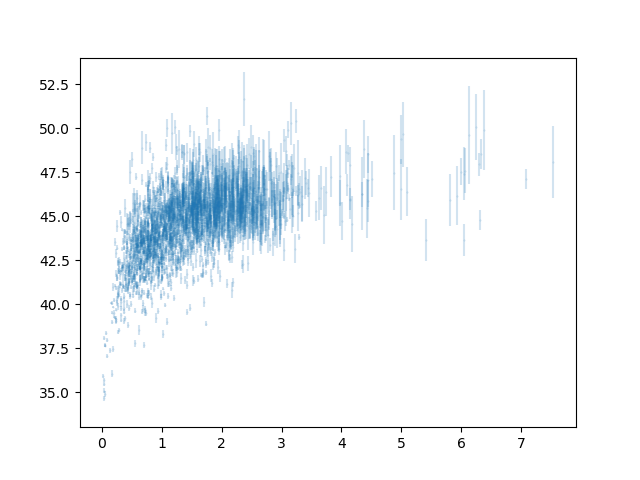

(33.0, 54.0)

In [223]:
plt.subplots()

# plot dist mod directly from data
plt.errorbar(qso_z_arr, mu_expread_arr, sigma_expread_arr, fmt='.', alpha=0.2, markersize=0.7)

#plt.xlim(-0.1, 6)
plt.ylim(33, 54)



<IPython.core.display.Javascript object>


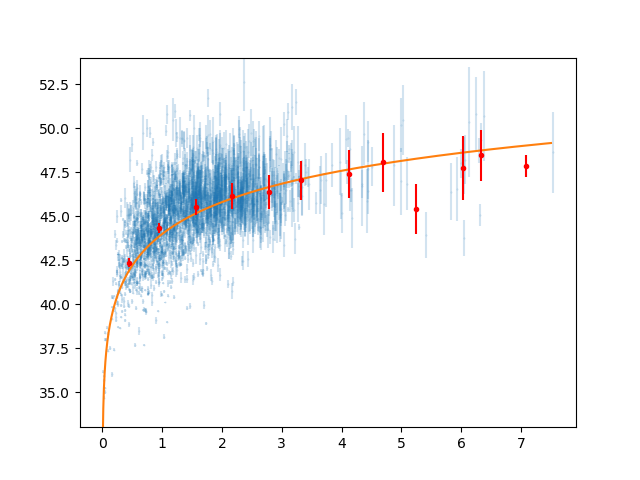

(33.0, 54.0)

In [224]:
plt.subplots()

# full data
plt.errorbar(qso_z_arr, mu_exp_arr, sigma_arr, fmt='.', alpha=0.2, markersize=0.7)

# # plot dist mod directly from data
# plt.errorbar(qso_z_arr, mu_expread_arr, sigma_expread_arr, fmt='.', alpha=0.2, markersize=0.7)

# binned
plt.errorbar(z_bin_arr, mu_exp_bin_arr, sigma_bin_arr, fmt='.', color='red',zorder=10)

# theory
plt.plot(z_arr, mu_th_arr, zorder=3)
#plt.xlim(-0.1, 6)
plt.ylim(33, 54)





# # x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
# x = (10**-15.9, 1e-18, 0.6, 0.66, 0.65, 6.8)

# # quasar kwargs
# quasars_kwargs = {'B': 1., # [nG]
#                   'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
#                   's': 1., # [Mpc]
#                   'omega_X': 2000.,  
#                   'omega_UV': 4.96, 
#                   'axion_ini_frac': 0.,
#                   'smoothed': False,
#                   'redshift_dependent': True,
#                   'method': 'simps',
#                   'prob_func': 'norm_log',
#                   'Nz': 101}

# (chi2_ga18, 
#  _, 
#  _, 
#  _,
#  _) = ch.chi2_quasars(x,
#                               data=data,
#                               vectorize=True,
#                               full_output=True,
#                               **quasars_kwargs)
# print(chi2_ga18)

In [249]:
# read dist mod
data_distmod = dt.load_quasars("./likelihoods", 
                   "quasars_Lusso2020.txt",
                   z_low=0.,
                   z_up=10.,
                   Gamma_low=1.2,
                   Gamma_up=100, 
                   get_dm=True)

# full data set
OmL_arr = np.linspace(0.1, 0.9, 25)
# OmL_arr = [0.65]
chi2_arr = []

for OmL in OmL_arr:
    
    # x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
    x = (10**-15.9, 1e-18, OmL, 0.66, 0.65, 6.8)

    # quasar kwargs
    quasars_kwargs = {'B': 1., # [nG]
                      'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                      's': 1., # [Mpc]
                      'omega_X': 2000.,  
                      'omega_UV': 4.96, 
                      'axion_ini_frac': 0.,
                      'smoothed': False,
                      'redshift_dependent': True,
                      'method': 'simps',
                      'prob_func': 'norm_log',
                      'Nz': 101}

#     (chi2, 
#      _, 
#      _, 
#      _,
#      _) = ch.chi2_quasars_dist_mod(x,
#                                   data=data_distmod,
#                                   vectorize=True,
#                                   full_output=True,
#                                   **quasars_kwargs)
    (chi2,
     mu_th_arr,
     mu_exp_arr,
     sigma_arr, 
     qso_z_arr) = ch.chi2_quasars_dist_mod(x,
                                  data=data_distmod,
                                  vectorize=True,
                                  full_output=True,
                                  **quasars_kwargs)
#     chi2 = ch.chi2_quasars(x,
#                                   data=data,
#                                   vectorize=False,
#                                   full_output=True,
#                                   **quasars_kwargs)
    chi2_arr.append(chi2)
chi2_arr = np.array(chi2_arr)

---2421 quasars before cut---
---2421 quasars remain after z cut---
---2421 quasars remain after Gamma cut---


In [250]:
# plt.subplots()
# plt.plot(qso_z_arr, mu_th_arr, '.', zorder=10)
# plt.plot(qso_z_arr, mu_exp_arr, '.')


<IPython.core.display.Javascript object>


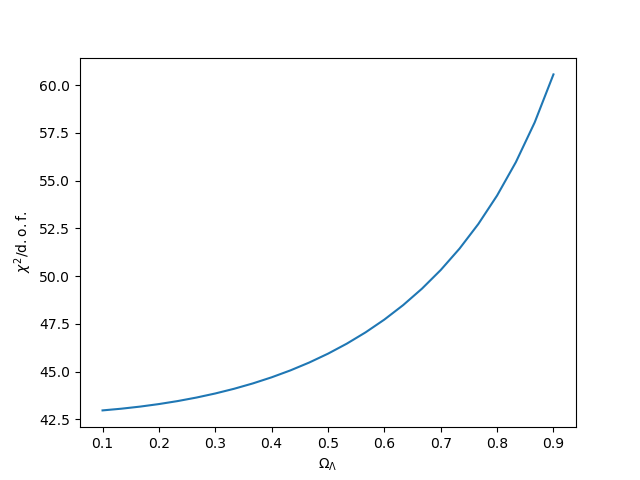

Text(0.5, 0, '$\\Omega_\\Lambda$')

In [251]:
plt.subplots()
plt.plot(OmL_arr, chi2_arr/len(qso_z_arr))
plt.ylabel(r'$\chi^2/{\rm d.o.f.}$')
plt.xlabel(r'$\Omega_\Lambda$')

In [225]:
# plot chi2 with full data set and chi2 with reduced data set

# full data set
OmL_arr = np.linspace(0.1, 0.9, 25)
chi2_arr = []

for OmL in OmL_arr:
    
    # x = (ma, ga, OmL, h0, qso_gamma, qso_beta)
    x = (10**-15.9, 1e-18, OmL, 0.66, 0.65, 6.8)

    # quasar kwargs
    quasars_kwargs = {'B': 1., # [nG]
                      'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                      's': 1., # [Mpc]
                      'omega_X': 2000.,  
                      'omega_UV': 4.96, 
                      'axion_ini_frac': 0.,
                      'smoothed': False,
                      'redshift_dependent': True,
                      'method': 'simps',
                      'prob_func': 'norm_log',
                      'Nz': 101}

    (chi2, 
     _, 
     _, 
     _,
     _) = ch.chi2_quasars(x,
                                  data=data,
                                  vectorize=True,
                                  full_output=True,
                                  **quasars_kwargs)
#     chi2 = ch.chi2_quasars(x,
#                                   data=data,
#                                   vectorize=False,
#                                   full_output=True,
#                                   **quasars_kwargs)
    chi2_arr.append(chi2)
chi2_arr = np.array(chi2_arr)

<IPython.core.display.Javascript object>


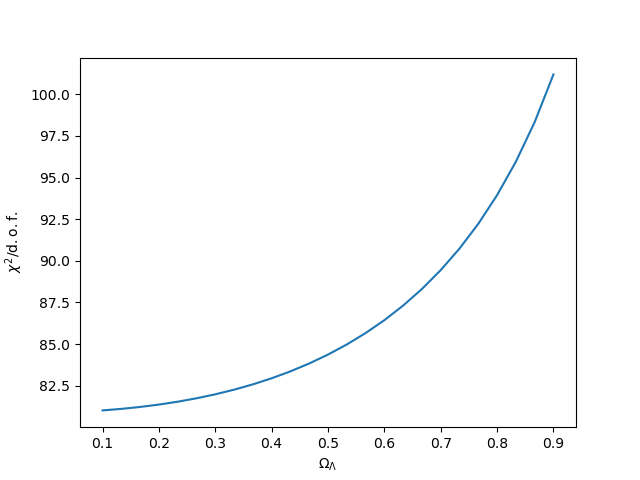

Text(0.5, 0, '$\\Omega_\\Lambda$')

In [197]:
plt.subplots()
plt.plot(OmL_arr, chi2_arr/len(qso_z_arr))
plt.ylabel(r'$\chi^2/{\rm d.o.f.}$')
plt.xlabel(r'$\Omega_\Lambda$')

In [176]:
# theory
# OmL = 0.6
chi2_bin_arr = []
for OmL in OmL_arr:
    h0 = 0.7
    #z_arr = np.linspace(0, 7.5, 3000)
    #mu_th_arr = dist_modulus_th(z_arr, h0=h0, OmL=OmL)

    # chi2 using binned data
    chi2_bin_arr.append(sum((dist_modulus_th(z_bin_arr, h0=h0, OmL=OmL) - mu_exp_bin_arr)**2/sigma_bin_arr**2))
    
chi2_bin_arr = np.array(chi2_bin_arr)    

<IPython.core.display.Javascript object>


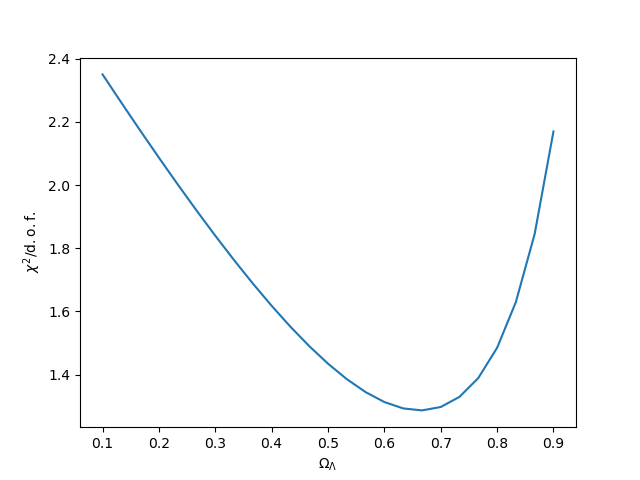

Text(0.5, 0, '$\\Omega_\\Lambda$')

In [177]:
plt.subplots()
plt.plot(OmL_arr, chi2_bin_arr/len(z_bin_arr))
plt.ylabel(r'$\chi^2/{\rm d.o.f.}$')
plt.xlabel(r'$\Omega_\Lambda$')

# fit a2 a3

In [157]:
a2_arr = np.linspace(0, 5, 6)
a3_arr = np.linspace(-0.2, 5, 6)
beta_arr = np.linspace(4, 8, 10)
gamma_arr = np.linspace(0, 1, 7)
a2_mesh, a3_mesh = np.meshgrid(a2_arr, a3_arr, indexing='ij')
a2_flat, a3_flat = a2_mesh.reshape(-1), a3_mesh.reshape(-1)

chi2_flat = []

for i,_ in enumerate(a2_flat):
    a2 = a2_flat[i]
    a3 = a3_flat[i]
    
    this_chi2_arr = []
    for gamma in gamma_arr:
        for beta in beta_arr:
            
            # x = (ma, ga, h0, a2, a3, qso_gamma, qso_beta)
            # x = (0, 0, 0.7, a2, a3, 0.65, 6.8)
            x = (0, 0, 0.7, a2, a3, gamma, beta)

            # quasar kwargs
            quasars_kwargs = {'B': 1., # [nG]
                              'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                              's': 1., # [Mpc]
                              'omega_X': 2000.,  
                              'omega_UV': 4.96, 
                              'axion_ini_frac': 0.,
                              'smoothed': False,
                              'redshift_dependent': True,
                              'method': 'simps',
                              'prob_func': 'norm_log',
                              'Nz': 101}

            (chi2, 
             _, 
             _, 
             _,
             _) = ch.chi2_quasars(x,
                                          data=data,
                                          vectorize=True,
                                          full_output=True,
                                          **quasars_kwargs)
            this_chi2_arr.append(chi2)

    chi2_min = min(np.nan_to_num(this_chi2_arr, nan=1e99))
    #print(chi2_min)
    chi2_flat.append(chi2_min)
chi2_flat = np.array(chi2_flat)

[-53.58903271 -53.59611976 -53.56416093 ... -53.8009696  -53.83861796
 -53.67442163]
[-31.3776  -31.2377  -31.1391  ... -32.40864 -32.50581 -31.73   ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-53.14458826 -53.15167531 -53.11971649 ... -53.35652516 -53.39417352
 -53.22997718]
[-31.3776  -31.2377  -31.1391  ... -32.40864 -32.50581 -31.73   ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-52.70014382 -52.70723087 -52.67527204 ... -52.91208072 -52.94972907
 -52.78553274]
[-31.3776  -31.2377  -31.1391  ... -32.40864 -32.50581 -31.73   ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-52.25569937 -52.26278642 -52.2308276  ... -52.46763627 -52.50528463
 -52.34108829]
[-31.3776  -31.2377  -31.1391  ... -32.40864 -32.50581 -31.73   ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-51.81125493 -51.81834198 -51.78638315 ... -52.02319183 -52.06084018
 -51.89664385]
[-31.3776  -31.2377  -3

In [158]:
min(np.nan_to_num(chi2_flat, nan=1e80).reshape(-1))

5125.3152940588625

<IPython.core.display.Javascript object>


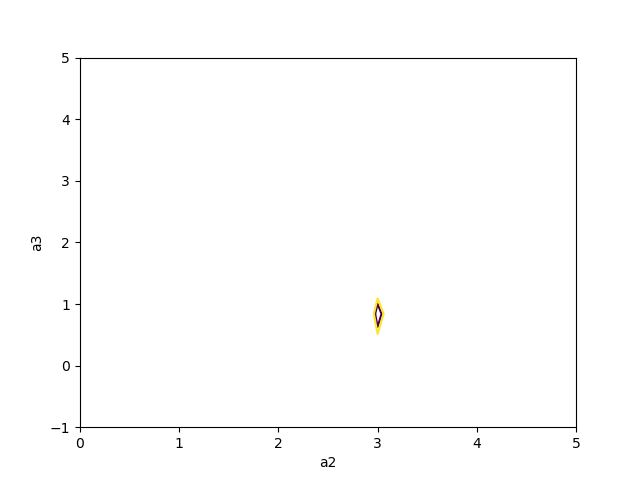

(-1.0, 5.0)

In [160]:
chi2_mesh = chi2_flat.reshape(a2_mesh.shape)
dchi2_mesh = chi2_mesh- min(np.nan_to_num(chi2_flat, nan=1e99).reshape(-1))

plt.subplots()
plt.contour(a2_mesh, a3_mesh, dchi2_mesh, [5.99, 9.21])
#plt.contour(a2_mesh, a3_mesh, dchi2_mesh, [5.99, 1e7])
#plt.contour(a2_mesh, a3_mesh, dchi2_mesh)
plt.xlabel('a2')
plt.ylabel('a3')
plt.ylim(-1, 5)

In [155]:
a2_arr = np.linspace(0, 5, 20)
a3_arr = np.linspace(-0.5, 5, 20)
a2_mesh, a3_mesh = np.meshgrid(a2_arr, a3_arr, indexing='ij')
a2_flat, a3_flat = a2_mesh.reshape(-1), a3_mesh.reshape(-1)

chi2_flat = []

for i,_ in enumerate(a2_flat):
    a2 = a2_flat[i]
    a3 = a3_flat[i]
            
    # x = (ma, ga, h0, a2, a3, qso_gamma, qso_beta)
    x = (0, 0, 0.7, a2, a3, 0.66, 6.4)
    # x = (0, 0, 0.7, a2, a3, 0.65, 6.8)
    # x = (0, 0, 0.7, a2, a3, 0.6, 8)

    # quasar kwargs
    quasars_kwargs = {'B': 1., # [nG]
                      'mg': omega_plasma(1.6e-8), # omega_plasma(ne_IGM),
                      's': 1., # [Mpc]
                      'omega_X': 2000.,  
                      'omega_UV': 4.96, 
                      'axion_ini_frac': 0.,
                      'smoothed': False,
                      'redshift_dependent': True,
                      'method': 'simps',
                      'prob_func': 'norm_log',
                      'Nz': 101}

    (chi2, 
     _, 
     _, 
     _,
     _) = ch.chi2_quasars(x,
                                  data=data,
                                  vectorize=True,
                                  full_output=True,
                                  **quasars_kwargs)
#     chi2 = ch.chi2_quasars(x,
#                                   data=data,
#                                   vectorize=False,
#                                   full_output=True,
#                                   **quasars_kwargs)
    chi2_flat.append(chi2)
chi2_flat = np.array(chi2_flat)

[-13.1398433  -13.14131342 -13.134468   ... -13.1609519  -13.15340569
 -13.15523158]
[-13.554036  -13.433144  -13.33725   ... -14.0439354 -13.7504184
 -13.876736 ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-13.17894243 -13.18132319 -13.17058121 ... -13.24955907 -13.26184801
 -13.20756455]
[-13.554036  -13.433144  -13.33725   ... -14.0439354 -13.7504184
 -13.876736 ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-13.21346502 -13.21655355 -13.2027556  ... -13.31762573 -13.34099011
 -13.25200484]
[-13.554036  -13.433144  -13.33725   ... -14.0439354 -13.7504184
 -13.876736 ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-13.24437105 -13.24802547 -13.2317665  ... -13.37290543 -13.40334337
 -13.29062411]
[-13.554036  -13.433144  -13.33725   ... -14.0439354 -13.7504184
 -13.876736 ]
[0.15649545 0.15278272 0.15201964 ... 0.36742346 0.33866798 0.16554685]
[-13.27234691 -13.27646412 -13.2581807  ... -13.41945101

<IPython.core.display.Javascript object>


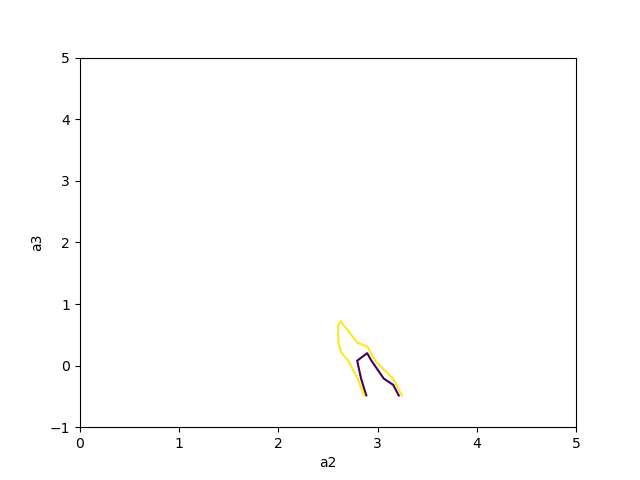

(-1.0, 5.0)

In [156]:
chi2_mesh = chi2_flat.reshape(a2_mesh.shape)
dchi2_mesh = chi2_mesh- min(np.nan_to_num(chi2_flat, nan=1e99).reshape(-1))

plt.subplots()
plt.contour(a2_mesh, a3_mesh, dchi2_mesh, [5.99, 9.21])
plt.xlabel('a2')
plt.ylabel('a3')
plt.ylim(-1, 5)

<IPython.core.display.Javascript object>


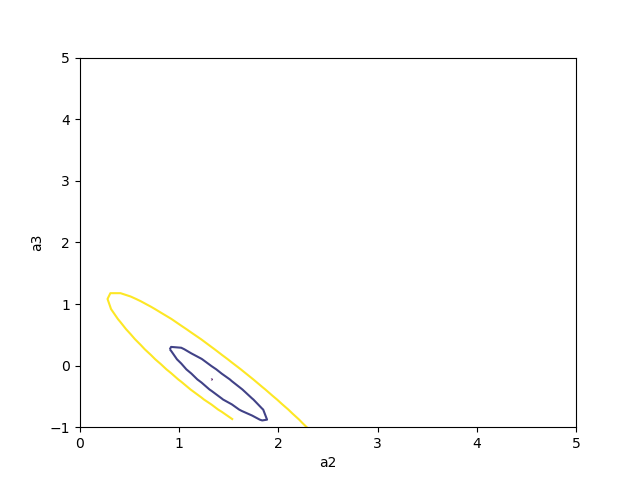

(-1.0, 5.0)

In [81]:
chi2_mesh = chi2_flat.reshape(a2_mesh.shape)
dchi2_mesh = chi2_mesh- min(np.nan_to_num(chi2_flat, nan=1e99).reshape(-1))

plt.subplots()
plt.contour(a2_mesh, a3_mesh, dchi2_mesh, [5.99, 1000, 5000])
plt.xlabel('a2')
plt.ylabel('a3')
plt.ylim(-1, 5)

# test the 2 param $D_L$

In [19]:
3/8+1/2+7/24

1.1666666666666667

In [27]:
print(a2_fn(0.3))
print(a3_fn(0.3))
print(a4_fn(0.3))

2.9357959935674085
3.5412261129570313
1.1206628184116416


<IPython.core.display.Javascript object>


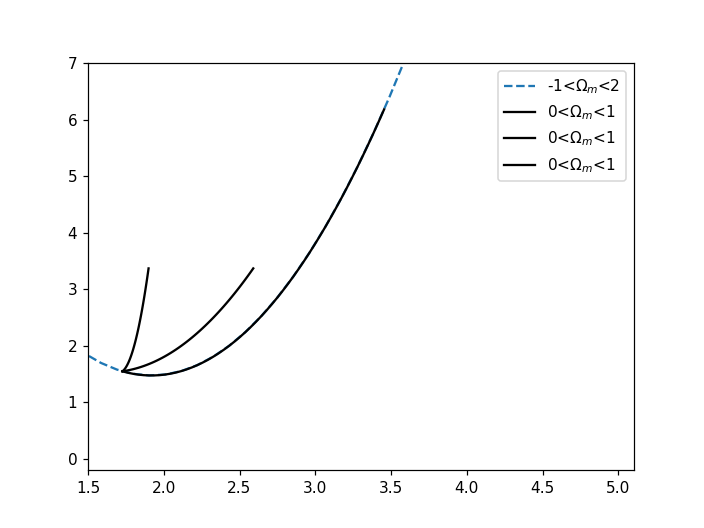

(1.5, 5.1)

In [26]:
def a2_fn(Omm, w=-1):
    return (w*3./4*(Omm) +3./4*(1.-w))*np.log(10)
def a3_fn(Omm, w=-1):
    #return (7./6 - 2.*Omm + 9./8*Omm**2)*np.log(10)**2
    return (9./8*w**2*Omm**2 + (-3./2*w**2+w/2)*Omm + (3*w**2/8-w/2+7/24))*np.log(10)**2
def a4_fn(Omm):
    return (-135/64.*Omm**3 + 4.5*Omm**2 - 47/16.*Omm + 5/8.)*np.log(10)**3


plt.subplots()
Omm_arr = np.linspace(-1., 2.)
plt.plot(a2_fn(Omm_arr), a3_fn(Omm_arr), '--', label='-1<$\Omega_m$<2')
Omm_arr = np.linspace(0., 1.)
plt.plot(a2_fn(Omm_arr), a3_fn(Omm_arr), 'k', label='0<$\Omega_m$<1')
Omm_arr = np.linspace(0., 1.)
plt.plot(a2_fn(Omm_arr, w=-0.5), a3_fn(Omm_arr, w=-0.5), 'k', label='0<$\Omega_m$<1')
Omm_arr = np.linspace(0., 1.)
plt.plot(a2_fn(Omm_arr, w=-0.1), a3_fn(Omm_arr, w=-0.5), 'k', label='0<$\Omega_m$<1')



plt.legend()
plt.ylim(-0.2, 7)
plt.xlim(1.5, 5.1)

In [161]:
a2_fn(0.3)

2.9357959935674085

<IPython.core.display.Javascript object>


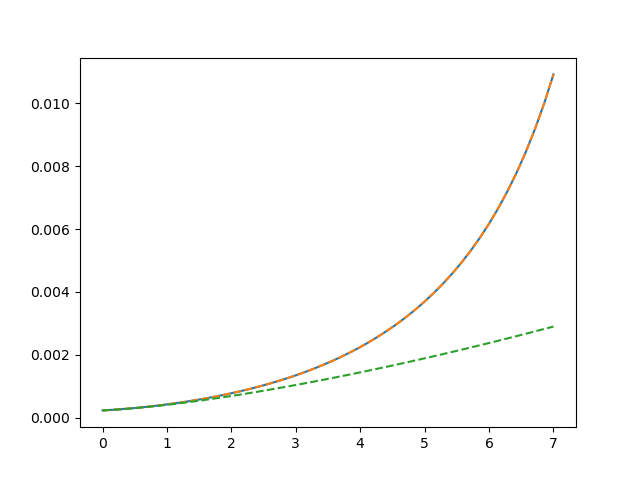

In [204]:
# test the 2 param Hz
z_arr = np.linspace(0, 7)
H_arr_cross_check = co.H_at_z_cross_check(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
H_arr = co.H_at_z(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
H_exact_arr = co.H_at_z_exact(z_arr, h0=0.7, OmL=0.7)
plt.subplots()
plt.plot(z_arr, H_arr)
plt.plot(z_arr, H_arr_cross_check, '--')
plt.plot(z_arr, H_exact_arr, '--')

<IPython.core.display.Javascript object>


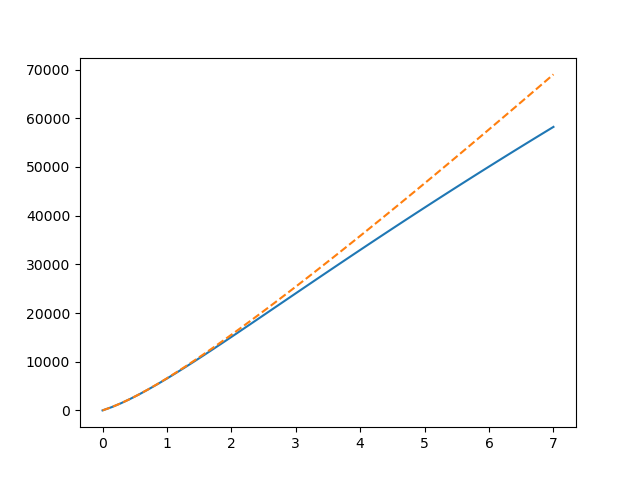

In [191]:
# test the 2 param DL
z_arr = np.linspace(0, 7)
approx_arr = co.dL_at_z(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
exact_arr = np.array([co.tau_at_z_exact(z, h0=0.7, OmL=0.7)*(1+z) for z in z_arr])
plt.subplots()
plt.plot(z_arr, approx_arr)
plt.plot(z_arr, exact_arr, '--')

In [22]:
print(a2_fn(0.3))
print(a3_fn(0.3))

2.9357959935674085
3.5412261129570313


<IPython.core.display.Javascript object>


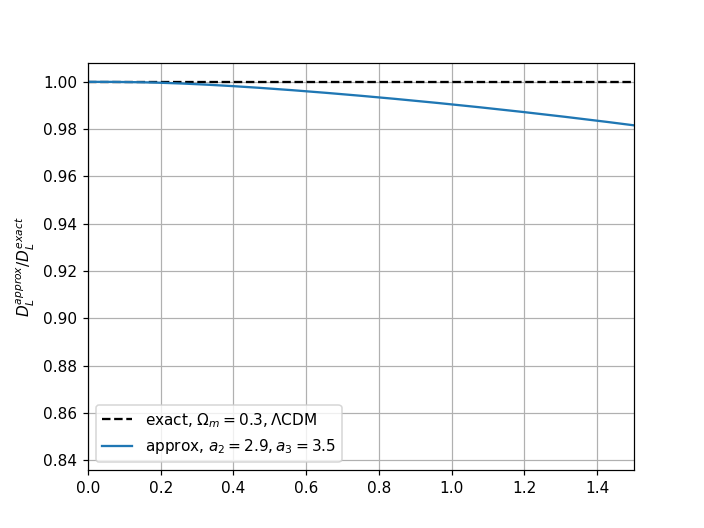

<IPython.core.display.Javascript object>


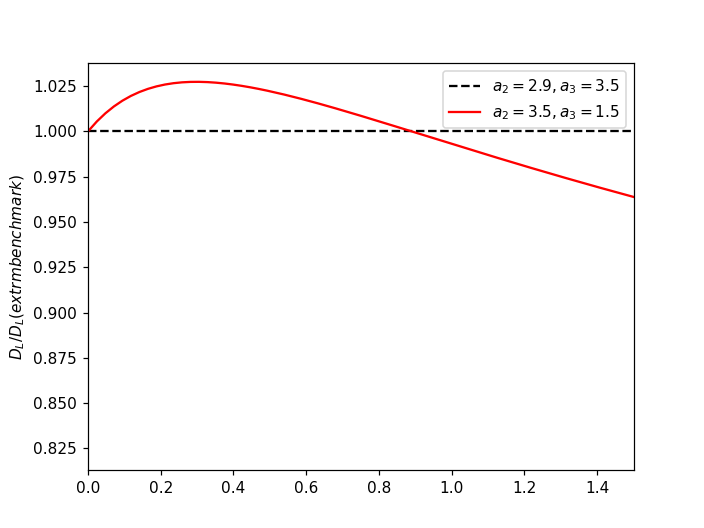

Text(0, 0.5, '$D_L/D_L(\textrm{benchmark})$')

In [40]:
# test the 2 param DL
z_arr = np.linspace(0.001, 7,300)
approx_arr = co.dL_at_z(z_arr, h0=0.7, a2=a2_fn(0.3), a3=a3_fn(0.3))
exact_arr = np.array([co.tau_at_z_exact(z, h0=0.7, OmL=0.7)*(1+z) for z in z_arr])

# manually shift to small a3 large a2 direction
sa3_la2_arr = co.dL_at_z(z_arr, h0=0.7, a2=3.5, a3=1.5)

# add some photon-to-axion conversion




# moment of truth

plt.subplots()
plt.plot(z_arr, [1]*len(exact_arr), 'k--', label="exact, $\Omega_m=0.3, \Lambda$CDM")
plt.plot(z_arr, approx_arr/exact_arr, label="approx, $a_2=2.9, a_3=3.5$")
plt.xlim(0, 6)
plt.xlim(0, 1.5)
plt.legend()
plt.grid()
plt.ylabel('$D_L^{approx}/D_L^{exact}$')

plt.subplots()
plt.plot(z_arr, approx_arr/approx_arr, 'k--', label=r'$a_2=2.9, a_3=3.5$')
plt.plot(z_arr, sa3_la2_arr/approx_arr, 'r-', label=r'$a_2=3.5, a_3=1.5$')
#plt.ylim(-1.2, 1.2)
plt.xlim(0, 6)
plt.xlim(0, 1.5)
plt.legend()
#plt.grid()
plt.ylabel('$D_L/D_L(\textrm{benchmark})$')

<IPython.core.display.Javascript object>


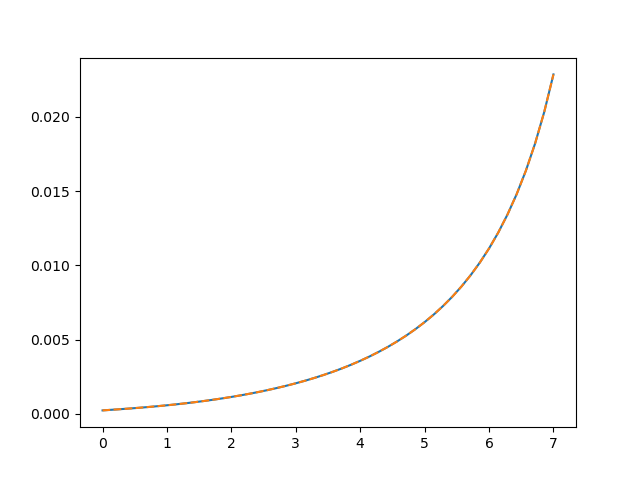

In [162]:
# test the 2 param DL log10 vs ln expansion
z_arr = np.linspace(0, 7)
H_arr = co.H_at_z(z_arr, h0=0.7, a2=2.0, a3=2.5)
H_naturallog_arr = co.H_at_z_naturallog(z_arr, h0=0.7, a2=2.0/np.log(10), a3=2.5/np.log(10)**2)
plt.subplots()
plt.plot(z_arr, H_arr)
plt.plot(z_arr, H_arr_naturallog, '--')


In [33]:
co.tau_at_z(3, 0.7, 3,-4, -5)

393.5037819308332

<IPython.core.display.Javascript object>


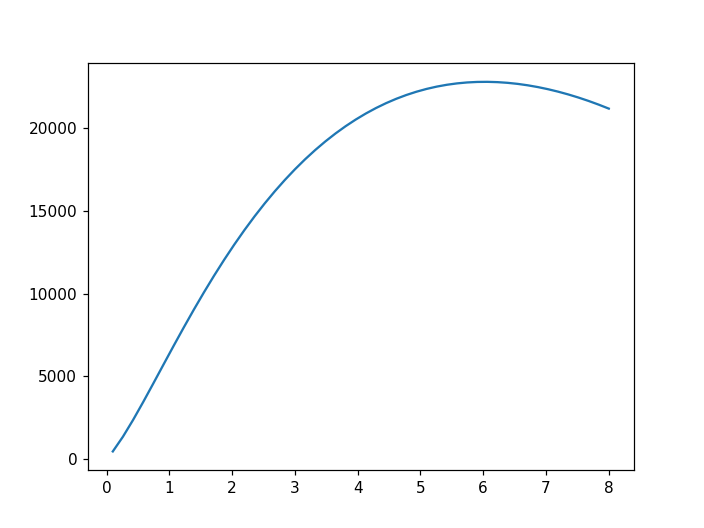

In [51]:
z_arr = np.linspace(0.1, 8)
plt.subplots()
plt.plot(z_arr, co.muLCDM(z_arr, 0.7,  3.37, 3.09, -5.50))
